# FYS-STK4155 – Project 1: Regression analysis and resampling methods

##### Authors: Adele Zaini, Gaute Arnesson Holen, Fridtjof Gjengset
##### Date: 11. October, 2021

## Before we start: 

### General introduction

In this first project we are asked to explore the techniques of Linear Regression, as the basic step to go further deeply into Machine Learning.

We started working with a vanilla dataset given by the Franke function, depending of two indenpendent variables $x$ and $y$, in order to set up all our linear regression methods. At the end, we performed the code with a real dataset taken from a terrain survey.

Franke function is a weighted sum of four exponentials:

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function is defined for $x,y\in [0,1]$.

To access the quality of the model, we perfom an error analysis, usually involving the Mean Square Error ($MSE$) and the $R^2$ score function:

$$
MSE(\hat{y},\hat{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

$$
R^2(\hat{y}, \tilde{\hat{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where $\tilde{\hat{y}}_i$ is the predicted value of the $i-th$ sample, $y_i$ is the corresponding true value and $\hat{y}$ is the mean value given by $ \bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i$.

[...]


### Code structure

The code is structured into libraries (e.g. `regression.py`), which gather all the functions needed for solving the various tasks, while the specific task codes are in `task*.py` files.

In the course of this notebook, we inserted runnable cells to run the task codes directly and dynamically from here to show up the results.

After a brief introduction, we will explain the algorithm, show the results and comment on them.

*Note: a further improvement to the code would be structuring as object-oriented. We have started converting the code in a new branch.*


## Exercise 1: Ordinary Least Square (OLS) on the Franke function

### Introduction

### Algorithm

After setting up our vanilla dataset using the FrankeFunction with two indipendent variables, we perfom a Ordinary Least Square regression.
We structured the code with all the useful functions in a library called 'linear_regression.py', while specific analysises due for the exercise are in 'task1.py'.

The implemented functions are the following:

- **create_X**(x,y,n) : Creates the designmatrix with a complexity n.
- **Frankefunction**(x,y) : Calculates the frankefunction fro the values x and y.
- **Plot_frankefunction**(z,y,z) : Creates a 3d plot
- **Split_and_Scale**(X,z,test_size, scale) : Splits the dataset using **train_test_split** from scikit learn, into a test_size which has default value set to *0.2*. Scales the data using **StandardScalar()** if boolean argument *scale=True*(it's default value). 
- **OLS_solver**(X_train, X_test, z_train, z_test) : Which calculates the optimal $\hat{\beta}$ values through matix inversion and returns these values, as well as our model $\tilde{z}$ and out prediction. 
- **MSE**(y_data, y_model) : calculates the mean square error of a dataset compared to a model or prediction.
- **R2**(y_data,y_model) : calculates the R2 score of a dataset compared to a model or prediction.

After splitting the data using **Split_and_Scale()**, we find the OLS using **OLS_solver()** on the Frankefunction by matrix inversion. 


We start by simply importing the functions and creating the dataset, as well as adding some noise to the dataset:


In [1]:
import numpy as np
from random import random, seed
from regression import FrankeFunction, Plot_FrankeFunction

# Create vanilla dataset:
np.random.seed(1234)

n = 25

x = np.linspace(0,1,n)
y = np.linspace(0,1,n) 
x, y = np.meshgrid(x,y)

sigma_N = 0.1; mu_N = 0 
z = FrankeFunction(x,y) +mu_N+sigma_N*np.random.randn(n,n)

Plot_FrankeFunction(x,y,z, title="Original noisy dataset")


ModuleNotFoundError: No module named 'regression'

Above, we see a plot of the frankefunction with some added noise. Having $\sigma = 0.1$ seems to be a reasonable amount of noise, by looking at the plot. 

We can know create the designmatrix, for a polynomial up to the 5th order. We also want to split and scale the dataset, so we can make our model and prediction.

We do not **have** to scale this dataset as we're not working with a lot of different units. If we imagine this to be terrain data, all the data in the set could be mesured in meteres. However, we use boolean as an argument to quickly be able to enable or disable scaling. We decided to scale the data for more adaptive code that can be reused for other purposes(Adele agree?).

To create the designmatrix, as well as to split and scale out data, we run the following lines:

In [ ]:
degree=5

X = create_X(x, y, degree)
X_train, X_test, z_train, z_test = Split_and_Scale(X,np.ravel(z)) #StardardScaler, test_size=0.2, scale=true

As we now have our training and test data seperated we can go on to find the optimal $\hat{\beta}$ values for the training set, as well as our model and prediction. We do this using **OLS_solver()** which calculates $\hat{\beta}$ through matrix inversion:

$$\hat{\beta}^{OLS} = (X^T X)^{-1}X^T z$$

Where X is the designmatrix for the traindata and z is the training datapoints from the frankefunction. To avoid problems arising from singular matrices, we use the **pinv()** function to find the psudoinverse.

This yields both our model and the prediction by
$$\tilde{z} = X \hat{\beta}$$
Where X is the designmatrix for the training data to produce our model, and the designmatrix for our test data to produce out prediction. 

We run the following line to find our result:

In [ ]:
ols_beta, z_tilde,z_predict = OLS_solver(X_train, X_test, z_train, z_test)

As we now have our model and prediction we can go on to calculate the mean square error and the R2 score for both our model and presdiction:

Finally, we know that the confidence interval of beta can be found by:
$$var(\beta) = \sigma^2 (X^T X)^{-1}$$
Where $\sigma$ si our deviation from the dataset, and X is the designmatrix for the training data.

We can therefore calculate the confidence interval in the following way:


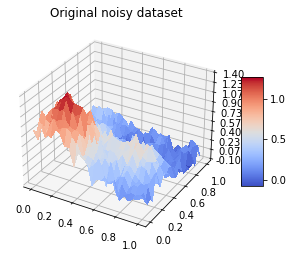

––––––––––––––––––––––––––––––––––––––––––––
Train MSE: 0.0113
Test MSE: 0.0111
––––––––––––––––––––––––––––––––––––––––––––
Train R2: 0.8808
Test R2: 0.8678
––––––––––––––––––––––––––––––––––––––––––––
Confidence interval of β-estimator at 95 %:


,$β_{-}$,$β_{ols}$,$β_{+}$
0,0.000,0.000,0.000
1,6.021,6.024,6.027
2,2.776,2.778,2.781
3,-27.426,-27.413,-27.400
4,-11.607,-11.596,-11.586
5,-4.559,-4.545,-4.531
6,38.309,38.339,38.369
7,34.419,34.441,34.463
8,17.549,17.572,17.595
9,-16.040,-16.009,-15.978


––––––––––––––––––––––––––––––––––––––––––––


In [2]:
%run ../1project/task1.py

Above we can see the confidence interval for our estimators with a 95% certainty. 


## Exercise 2:

We can reproduce figure. 2.11 from Hastie, Tibshiani and Friedman, by plotting the MSE as a function of the complexity of the model. By using the same x, y and z values, we calculate the designmatrix **X** with a complexity from n=2 to n=20, where n is the compexity/degree og the polynomial. For each designmtrix we find the OLS and calcualte the MSE for the test and training data. We import the function **plot_ols_complexity**(x, y, z, complexity) from the linear_regression library, which does exactly this. It's default valye for complexity is set to **range(2,20)**. After importing **plot_ols_complexity()** we can therefore simply write:



In [ ]:
from regression import plot_ols_complexity
complexity = range(2,20)
plot_ols_complexity(x,y,z,complexity)

Initially the MSE for both test and train decreases as out model imporves with the complexity of the polynomial. Around a polynomial of the 5th degree, we can see that the MSE for the test data increases, while the MSE for the train data continues to decrease. This is beacuse the increased complexity of the designmatrix causes overfitting. Out model therefore fits the training data better, but gives a poor model for the test data, because it has overfitted to the training set. It seems out model does best around a complexity of n=5.


Part 1: $MSE_{train}$ and $MSE_{test}$ in function of the complexity of the model (degree-order of polynomial) 



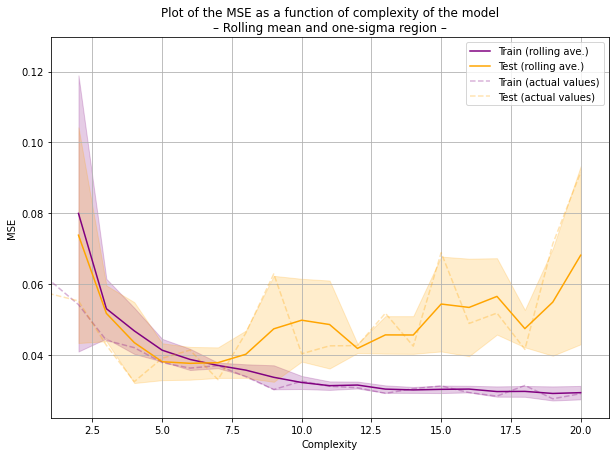

Part 2: perform a bias-variance tradeoff analysis 

Train datapoints: 500
Test datapoints: 125


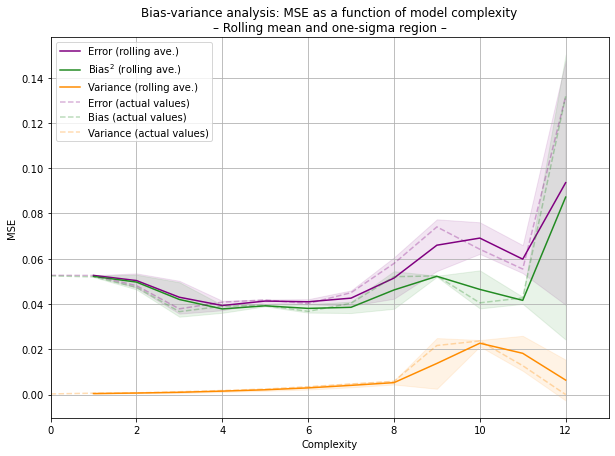

Bias-variance tradeoff analysis with variation in training and testing datapoints
Datapoints: 625 – Test size: 0.2
Datapoints: 625 – Test size: 0.33
Datapoints: 1600 – Test size: 0.2
Datapoints: 1600 – Test size: 0.33


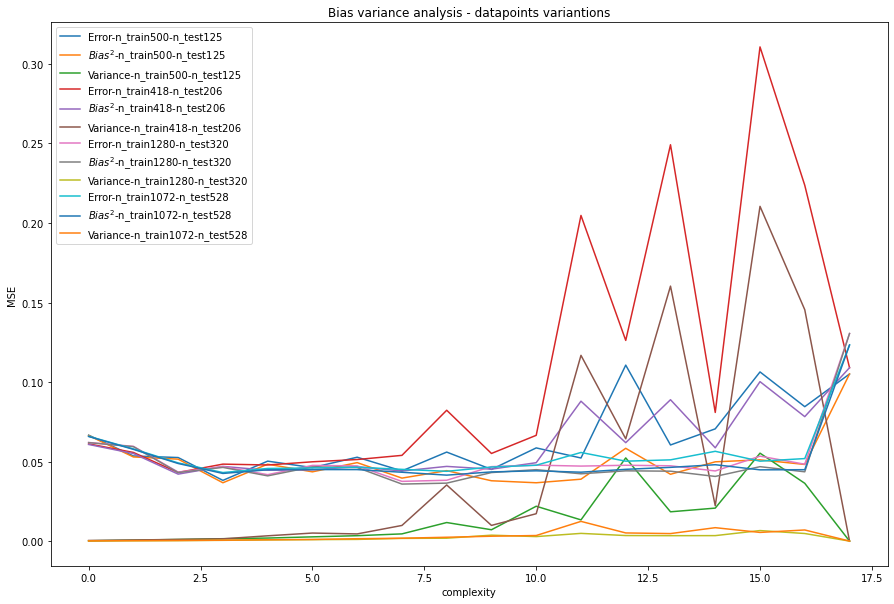

In [6]:
%run ../1project/task2.py

## Exercise 3:

(900, 6)
NB, the best lambda was the was the first lambda value
NB, the best lambda was the was the first lambda value
NB, the best lambda was the was the first lambda value
(900, 10)
NB, the best lambda was the was the first lambda value
NB, the best lambda was the was the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.050181051468984, tolerance: 0.006301892064631231
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.630563878003553, tolerance: 0.006301892064631231
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03831240900119859, tolerance: 0.006301892064631231
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6811018658124635, tolerance: 0.005071980463418033
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.681088374945125, tolerance: 0.005071980463418033
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6793696906916877, tolerance: 0.005071980463418033
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

NB, the best lambda was the was the first lambda value
NB, the best lambda was the was the first lambda value
(900, 15)
NB, the best lambda was the was the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.986019353650125, tolerance: 0.006091860407188764
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.2272573136405835, tolerance: 0.00693197993687662
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.2272573136403855, tolerance: 0.00693197993687662
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

NB, the best lambda was the was the first lambda value
NB, the best lambda was the was the first lambda value
(900, 21)
NB, the best lambda was the was the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.627542959206492, tolerance: 0.007867171760610976
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.259216222780016, tolerance: 0.0072700218203059
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.259216222779898, tolerance: 0.0072700218203059
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/l

NB, the best lambda was the was the first lambda value
NB, the best lambda was the was the first lambda value
NB, the best lambda was the was the first lambda value
NB, the best lambda was the was the first lambda value
(900, 28)


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.788293023343049, tolerance: 0.006073385432557434
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.788282466178869, tolerance: 0.006073385432557434
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.786936531832084, tolerance: 0.006073385432557434
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

NB, the best lambda was the was the first lambda value
NB, the best lambda was the was the first lambda value
NB, the best lambda was the was the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.939778386410605, tolerance: 0.006884223368929791
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.939778386405273, tolerance: 0.006884223368929791
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.939778385727084, tolerance: 0.006884223368929791
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

NB, the best lambda was the was the first lambda value
(900, 36)


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.355933786402215, tolerance: 0.00743995542803406
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.35591875035561, tolerance: 0.00743995542803406
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.354002036757655, tolerance: 0.00743995542803406
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/l

NB, the best lambda was the was the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.854579589876806, tolerance: 0.006950055626139905
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.854579506561, tolerance: 0.006950055626139905
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.854568889798928, tolerance: 0.006950055626139905
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/

(900, 45)


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.61562746696267, tolerance: 0.0057330857576162715
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.615627466951441, tolerance: 0.0057330857576162715
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.615627465521315, tolerance: 0.0057330857576162715
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

NB, the best lambda was the was the first lambda value
NB, the best lambda was the was the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.733285988276163, tolerance: 0.00519869725156631
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.079904486105706, tolerance: 0.007488682839304024
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.079904486105657, tolerance: 0.007488682839304024
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklear

(900, 55)


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.329058859311728, tolerance: 0.007625284848696629
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.329058858248674, tolerance: 0.007625284848696629
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.3290587227846125, tolerance: 0.007625284848696629
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

NB, the best lambda was the was the first lambda value
NB, the best lambda was the was the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8871372924831795, tolerance: 0.004840289779464408
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8871372924831458, tolerance: 0.004840289779464408
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8871372924804892, tolerance: 0.004840289779464408
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB, the best lambda was the was the first lambda value
(900, 66)


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.4542343354166505, tolerance: 0.005717734410280637
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.1265271677814646, tolerance: 0.005717734410280637
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.4542343354166505, tolerance: 0.005717734410280637
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB, the best lambda was the was the first lambda value
NB, the best lambda was the was the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.278428318877312, tolerance: 0.006052659722479517
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.297350398956424, tolerance: 0.007823479158486177
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.297350398956356, tolerance: 0.007823479158486177
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

NB, the best lambda was the was the first lambda value
NB, the best lambda was the was the first lambda value
(900, 78)


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.455901315433133, tolerance: 0.005186458830109905
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.455928515972805, tolerance: 0.005186458830109905
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.459312548976438, tolerance: 0.005186458830109905
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

NB, the best lambda was the was the first lambda value
NB, the best lambda was the was the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.931805073211043, tolerance: 0.007377892376604874
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.730778818469187, tolerance: 0.007335900484384775
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.73077881846915, tolerance: 0.007335900484384775
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklear

NB, the best lambda was the was the first lambda value
(900, 91)


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.730778818469187, tolerance: 0.007335900484384775
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.565668545886902, tolerance: 0.006664653732377889
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.565668545886891, tolerance: 0.006664653732377889
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.0069911813103465, tolerance: 0.007849870014207347
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.006991181310315, tolerance: 0.007849870014207347
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.006991181305553, tolerance: 0.007849870014207347
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.324586300055527, tolerance: 0.006512925404914228
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.906455674328489, tolerance: 0.0072361950562004045
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.90645567432843, tolerance: 0.0072361950562004045
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

(900, 105)


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.732711489790757, tolerance: 0.0072361950562004045
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01854017858964596, tolerance: 0.0072361950562004045
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.732711489790757, tolerance: 0.0072361950562004045
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.997497422938713, tolerance: 0.007643030670834199
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9087653412407013, tolerance: 0.004671537542085671
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9087653412414185, tolerance: 0.004671537542085671
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

NB, the best lambda was the was the first lambda value
(900, 120)


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9087653412407013, tolerance: 0.004671537542085671
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.705830142609144, tolerance: 0.0032172528347768187
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7058301426090736, tolerance: 0.0032172528347768187
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/s

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.957899282644099, tolerance: 0.007289929986458927
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.957899282644037, tolerance: 0.007289929986458927
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.957899282639164, tolerance: 0.007289929986458927
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

(900, 136)


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5303260080547405, tolerance: 0.003048671911935518
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2405651503538313, tolerance: 0.003048671911935518
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5303260080547405, tolerance: 0.003048671911935518
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.572044067799367, tolerance: 0.006182052975432772
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.572044067799367, tolerance: 0.006182052975432772
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.562217266762774, tolerance: 0.007113159743408285
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

(900, 153)


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.740885005403167, tolerance: 0.006851098047897122
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.740885005399257, tolerance: 0.006851098047897122
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.7408850049035856, tolerance: 0.006851098047897122
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.283679318982226, tolerance: 0.00606837198854386
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.28367928901964, tolerance: 0.00606837198854386
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.283675470943464, tolerance: 0.00606837198854386
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/l

(900, 171)


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.891467529408077, tolerance: 0.0036703252323408374
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8914675293987755, tolerance: 0.0036703252323408374
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8914675282124325, tolerance: 0.0036703252323408374
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.057800365476499, tolerance: 0.007659006985059692
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.056742980931489, tolerance: 0.007659006985059692
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.894875222157119, tolerance: 0.007659006985059692
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

(900, 190)


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4677588094449225, tolerance: 0.004371312351507994
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.467741095813338, tolerance: 0.004371312351507994
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.465485923465224, tolerance: 0.004371312351507994
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.894547735836501, tolerance: 0.00753121471502895
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.894541157052414, tolerance: 0.00753121471502895
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.89369682013994, tolerance: 0.00753121471502895
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/l

(900, 210)


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.185890768305141, tolerance: 0.007695046994811375
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.185890768305154, tolerance: 0.007695046994811375
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.185890768301416, tolerance: 0.007695046994811375
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.627888746004978, tolerance: 0.007152126539193333
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.6278887460049605, tolerance: 0.007152126539193333
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.627888746001911, tolerance: 0.007152126539193333
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

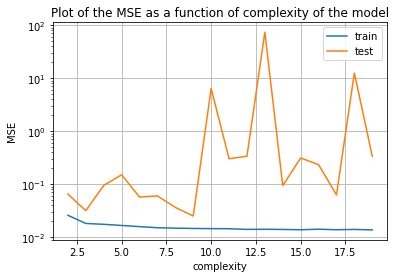

In [1]:
%run ../1project/task3.py

## Exercise 4:

## Exercise 5:

## Exercise 6:

In [ ]:
import pandas as pd
# Confidence interval
beta_ols_variance = sigma_N**2 * np.linalg.pinv(X_train.T @ X_train) #Calculates variance of beta
var_diag=np.diag(beta_ols_variance)
ci1 = ols_beta - 1.96 * np.sqrt(var_diag)/(X.shape[0])
ci2 = ols_beta + 1.96 * np.sqrt(var_diag)/(X.shape[0])
print('Confidence interval of β-estimator at 95 %:')
ci_df = {r'$β_{-}$': ci1,
         r'$β_{ols}$': ols_beta,
         r'$β_{+}$': ci2}
ci_df = pd.DataFrame(ci_df)
display(np.round(ci_df,3))#prec
print("––––––––––––––––––––––––––––––––––––––––––––")
